In [1]:
# Import libraries
import moments, moments.LD
import pandas as pd, numpy as np
from collections import defaultdict
import demes, demesdraw, matplotlib.pylab as plt
from matplotlib.legend import Legend
import msprime as ms

import model, slice, get_LD, plot_LD

In [3]:
#! wget https://raw.githubusercontent.com/apragsdale/african-structure-paper/main/demes_models/merger_with_stem_migration.yaml

In [2]:
mws = model.load_yaml("merger_with_stem_migration.yaml")

In [3]:
def plot_comparison(LDpop1,LDpop2,labels=["Original","Size Change"]):
    rhos = np.logspace(-2, 2, 21)
    
    # plot D2
    f = plt.figure(figsize=(10,3))
    ax = f.add_subplot(121)
    ax2 = f.add_subplot(122)

    ax.plot(rhos,LDpop1[:,0],label=labels[0])
    ax.plot(rhos,LDpop2[:,0],label=labels[1])
    ax.legend()
    ax.set_yscale("log")
    ax.set_xscale("log")
    ax.set_ylabel(r"$\sigma_d^2$")
    ax.set_xlabel(r"$\rho$")

    # plot DZ
    ax2.plot(rhos,LDpop1[:,1],label=labels[0])
    ax2.plot(rhos,LDpop2[:,1],label=labels[1])
    ax2.legend()
    ax2.set_yscale("log")
    ax2.set_xscale("log")
    ax2.set_ylabel(r"$\sigma_{Dz}$")
    ax2.set_xlabel(r"$\rho$")

    plt.tight_layout()
    plt.show()

def plot_iicr(iirc,T): 
    plt.step(T, iirc)
    plt.xticks(fontsize= 12)
    plt.yticks(fontsize= 12)
    plt.yscale("log")
    plt.xscale("log")
    plt.xlim((1e3,1.9e6))
    plt.ylim((1e3,1e5))
    plt.xlabel("time ago (years)",fontsize = 14)
    plt.ylabel(r"IICR ($\it{Ne}$)",fontsize = 14);

In [4]:
def read_relate(relate_file,generation_time=1):
    '''
    Reads relate .coal file and returns two objects: the times scaled by generation time, and the population sizes computed as 0.5/coal
    '''
    pop_size = {}
    with open(relate_file) as relatef:
        pops = relatef.readline().strip('\n').split()
        times = relatef.readline().strip('\n').split()
        times = np.array(times,dtype="float")*generation_time
        print(pops,times)
        coals = relatef.readlines()
        for line in coals:
            line = line.strip('\n').split()
            pop1 = pops[int(line[0])]
            pop2 = pops[int(line[1])]
            coal = np.array(line[2:],dtype="float")
            pop_size[(pop1,pop2)] = 0.5/coal
    relatef.close()

    return(pops,times,pop_size)

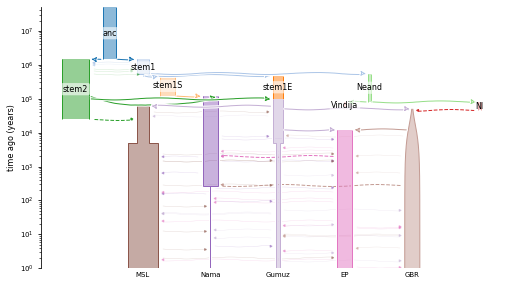

In [5]:
demesdraw.tubes(mws, log_time=True, num_lines_per_migration=3)
plt.savefig("Migration_with_stem.svg",format='svg',transparent = False)

In [6]:
T,times_dic = slice.sample_timepoints(mws,10e7)

In [7]:
times_in_gen = T/29
times_in_gen[0] = 1

In [8]:
# Compute LD from present day pops in model
mws_sliced = slice.slice_timepoints(mws,time_points=[0])
mws_sliced_LD = get_LD.get_LD_from_sliced_demes(mws_sliced)

MENDE (MSL)

/home/gfemer/moments/lib/python3.8/site-packages/msprime/demography.py:4320: UserWarning: Doubling the number of steps has resulted in different  predictions, please re-run with smaller step sizes to ensure  numerical accuracy.
  warnings.warn(


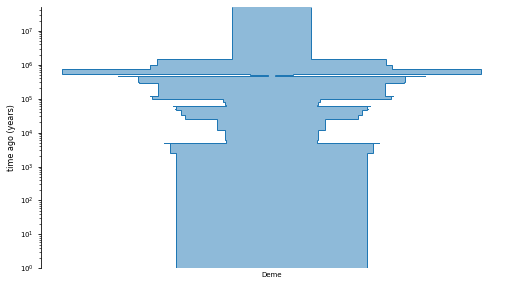

In [9]:
msl_R, msl_iicr, _ = model.get_iicr(mws,pop="MSL",T=times_in_gen)
msl_sc = model.size_change_from_iicr(msl_iicr,T,time_units="years")

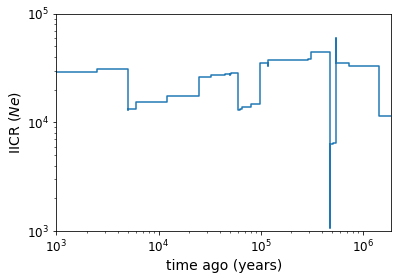

In [10]:
plot_iicr(msl_iicr,T)

In [11]:
# Actually slice
msl_sliced = slice.slice_timepoints(msl_sc,time_points=[0])
msl_sliced_LD = get_LD.get_LD_from_sliced_demes(msl_sliced)


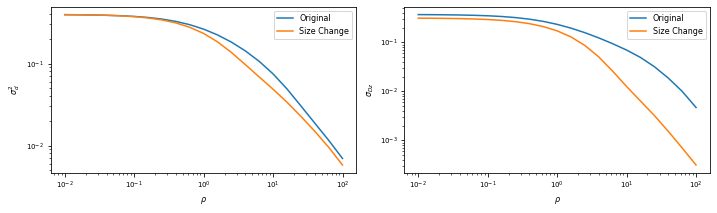

In [12]:
plot_comparison(mws_sliced_LD['MSL'][-1],msl_sliced_LD['Deme'][-1])

Nama

/home/gfemer/moments/lib/python3.8/site-packages/msprime/demography.py:4320: UserWarning: Doubling the number of steps has resulted in different  predictions, please re-run with smaller step sizes to ensure  numerical accuracy.
  warnings.warn(


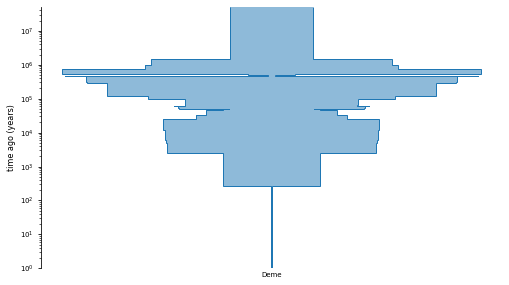

In [13]:
nama_R,nama_iicr, _ = model.get_iicr(mws,pop="Nama",T=times_in_gen)
nama_sc = model.size_change_from_iicr(nama_iicr,T,time_units="years")

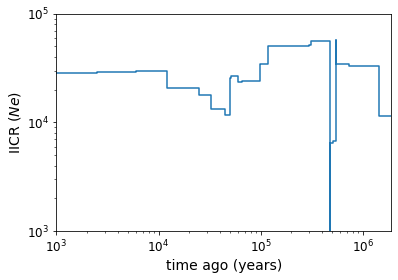

In [14]:
plot_iicr(nama_iicr,T)

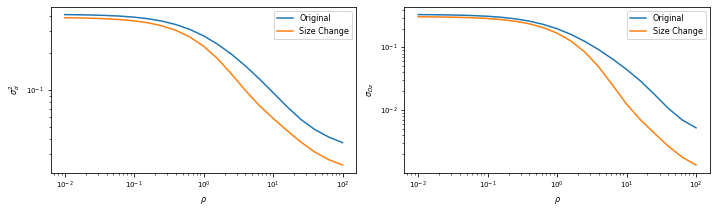

In [15]:
# Actually slice
nama_sliced = slice.slice_timepoints(nama_sc,time_points=[0])
nama_sliced_LD = get_LD.get_LD_from_sliced_demes(nama_sliced)
plot_comparison(mws_sliced_LD['Nama'][-1],nama_sliced_LD['Deme'][-1])

Gumuz

/home/gfemer/moments/lib/python3.8/site-packages/msprime/demography.py:4320: UserWarning: Doubling the number of steps has resulted in different  predictions, please re-run with smaller step sizes to ensure  numerical accuracy.
  warnings.warn(


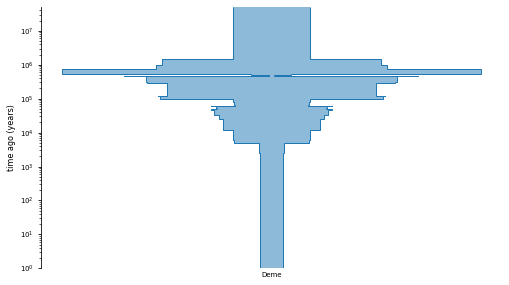

In [16]:
Gumuz_R,Gumuz_iicr, _ = model.get_iicr(mws,pop="Gumuz",T=times_in_gen)
Gumuz_sc = model.size_change_from_iicr(Gumuz_iicr,T,time_units="years")

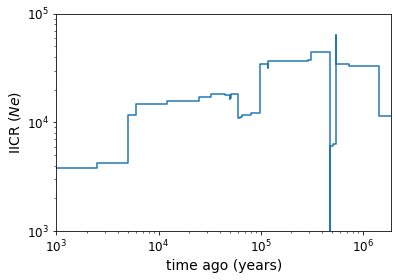

In [17]:
plot_iicr(Gumuz_iicr,T)

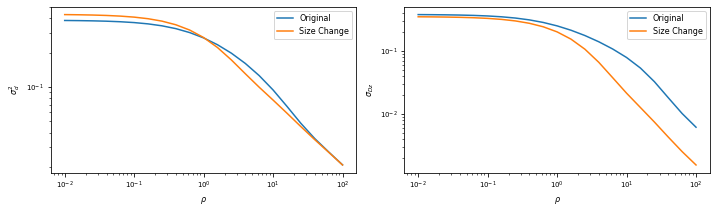

In [18]:
# Actually slice
gumuz_sliced = slice.slice_timepoints(Gumuz_sc,time_points=[0])
gumuz_sliced_LD = get_LD.get_LD_from_sliced_demes(gumuz_sliced)
plot_comparison(mws_sliced_LD['Gumuz'][-1],gumuz_sliced_LD['Deme'][-1])

EP

/home/gfemer/moments/lib/python3.8/site-packages/msprime/demography.py:4320: UserWarning: Doubling the number of steps has resulted in different  predictions, please re-run with smaller step sizes to ensure  numerical accuracy.
  warnings.warn(


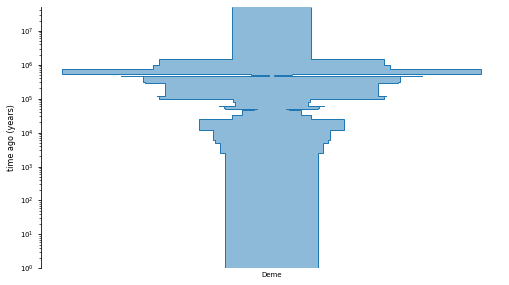

In [19]:
EP_R,EP_iicr, _ = model.get_iicr(mws,pop="EP",T=times_in_gen)
EP_sc = model.size_change_from_iicr(EP_iicr,T,time_units="years")

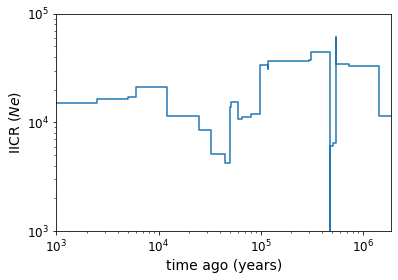

In [20]:
plot_iicr(EP_iicr,T)

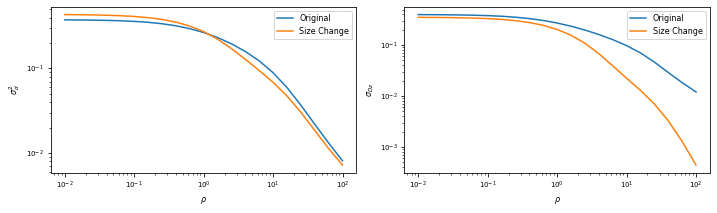

In [21]:
# Actually slice
EP_sliced = slice.slice_timepoints(EP_sc,time_points=[0])
EP_sliced_LD = get_LD.get_LD_from_sliced_demes(EP_sliced)
plot_comparison(mws_sliced_LD['EP'][-1],EP_sliced_LD['Deme'][-1])

GBR

/home/gfemer/moments/lib/python3.8/site-packages/msprime/demography.py:4320: UserWarning: Doubling the number of steps has resulted in different  predictions, please re-run with smaller step sizes to ensure  numerical accuracy.
  warnings.warn(


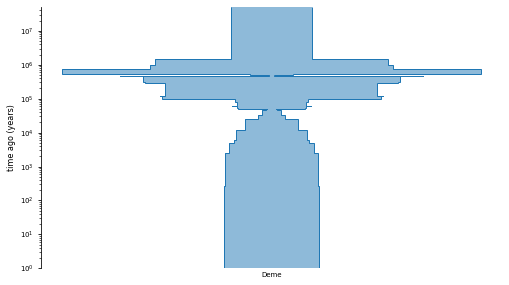

In [22]:
GBR_R,GBR_iicr, _ = model.get_iicr(mws,pop="GBR",T=times_in_gen)
GBR_sc = model.size_change_from_iicr(GBR_iicr,T,time_units="years")

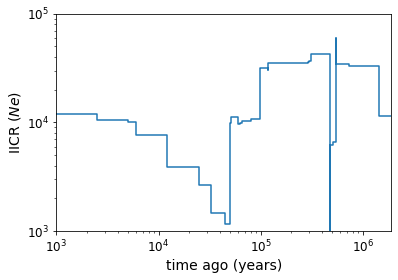

In [23]:
plot_iicr(GBR_iicr,T)

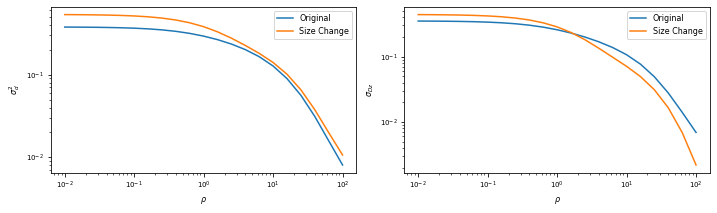

In [24]:
# Actually slice
GBR_sliced = slice.slice_timepoints(GBR_sc,time_points=[0])
GBR_sliced_LD = get_LD.get_LD_from_sliced_demes(GBR_sliced)
plot_comparison(mws_sliced_LD['GBR'][-1],GBR_sliced_LD['Deme'][-1])

Ancestral population

In [25]:
anc_sliced = slice.slice_timepoints(mws,time_points=[mws['anc'].end_time])
anc_sliced_LD = get_LD.get_LD_from_sliced_demes(anc_sliced)

In [26]:
anc_times = times_dic['anc']
anc_times_in_gen = anc_times/29
anc_times_in_gen[0] = 1

TypeError: unsupported operand type(s) for /: 'list' and 'int'

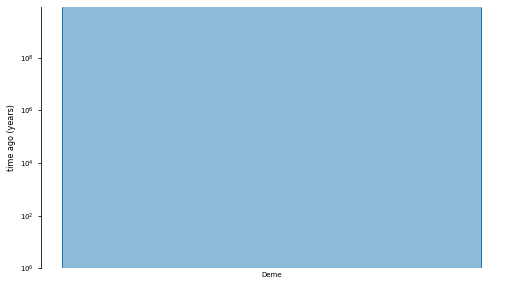

In [ ]:
anc_R,anc_iicr, _ = model.get_iicr(anc_sliced[1442022],pop="anc",T=anc_times_in_gen)
anc_sc = model.size_change_from_iicr(anc_iicr,anc_times,time_units="years")

In [ ]:
anc_sliced_LD

defaultdict(list,
            {'anc': [array([[4.52325114e-01, 3.61498592e-01, 1.00000000e+00],
                     [4.51036627e-01, 3.60258331e-01, 1.00000000e+00],
                     [4.49009708e-01, 3.58307738e-01, 1.00000000e+00],
                     [4.45834866e-01, 3.55253602e-01, 1.00000000e+00],
                     [4.40895385e-01, 3.50504772e-01, 1.00000000e+00],
                     [4.33290433e-01, 3.43200343e-01, 1.00000000e+00],
                     [4.21768190e-01, 3.32150324e-01, 1.00000000e+00],
                     [4.04728633e-01, 3.15849135e-01, 1.00000000e+00],
                     [3.80410912e-01, 2.92677046e-01, 1.00000000e+00],
                     [3.47410632e-01, 2.61433187e-01, 1.00000000e+00],
                     [3.05555556e-01, 2.22222222e-01, 1.00000000e+00],
                     [2.56783006e-01, 1.77322658e-01, 1.00000000e+00],
                     [2.05233687e-01, 1.31224776e-01, 1.00000000e+00],
                     [1.56033759e-01, 8.92828603e-02

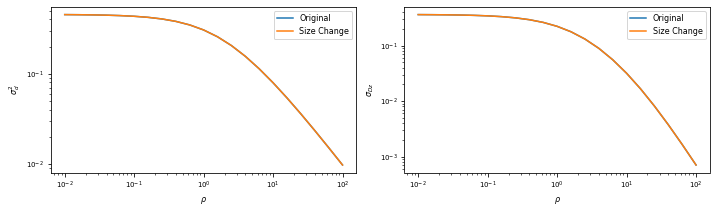

In [ ]:
# Actually slice
anc_sc_sliced = slice.slice_timepoints(anc_sc,time_points=[0])
anc_sc_sliced_LD = get_LD.get_LD_from_sliced_demes(anc_sc_sliced)
plot_comparison(anc_sliced_LD['anc'][-1],anc_sc_sliced_LD['Deme'][-1])

All pops model - LD

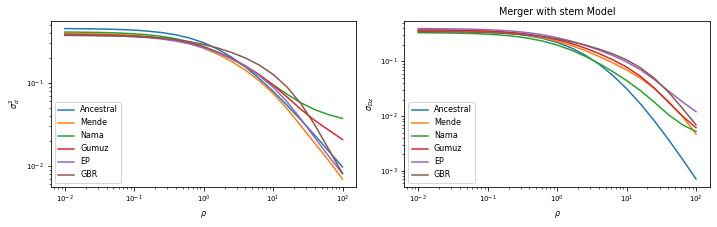

In [ ]:
rhos = np.logspace(-2, 2, 21)

# plot D2
f = plt.figure(figsize=(10,3))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)

ax.plot(rhos,anc_sliced_LD['anc'][-1][:,0],label="Ancestral")
ax.plot(rhos,mws_sliced_LD['MSL'][-1][:,0],label="Mende")
ax.plot(rhos,mws_sliced_LD['Nama'][-1][:,0],label="Nama")
ax.plot(rhos,mws_sliced_LD['Gumuz'][-1][:,0],label="Gumuz")
ax.plot(rhos,mws_sliced_LD['EP'][-1][:,0],label="EP")
ax.plot(rhos,mws_sliced_LD['GBR'][-1][:,0],label="GBR")

ax.legend()
ax.set_yscale("log")
ax.set_xscale("log")
ax.set_ylabel(r"$\sigma_d^2$")
ax.set_xlabel(r"$\rho$")

# plot DZ
ax2.plot(rhos,anc_sliced_LD['anc'][-1][:,1],label="Ancestral")
ax2.plot(rhos,mws_sliced_LD['MSL'][-1][:,1],label="Mende")
ax2.plot(rhos,mws_sliced_LD['Nama'][-1][:,1],label="Nama")
ax2.plot(rhos,mws_sliced_LD['Gumuz'][-1][:,1],label="Gumuz")
ax2.plot(rhos,mws_sliced_LD['EP'][-1][:,1],label="EP")
ax2.plot(rhos,mws_sliced_LD['GBR'][-1][:,1],label="GBR")

ax2.legend()
ax2.set_yscale("log")
ax2.set_xscale("log")
ax2.set_ylabel(r"$\sigma_{Dz}$")
ax2.set_xlabel(r"$\rho$")

plt.tight_layout()
plt.title("Merger with stem Model")
plt.savefig("Dstats_allpops_mergerwithstem.pdf",format='pdf',transparent = False)
#plt.show()

All pops Pop size change from IICR - LD

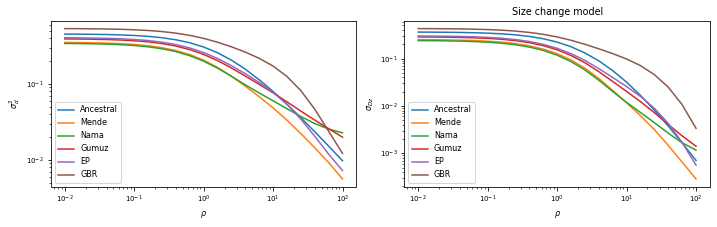

In [32]:
rhos = np.logspace(-2, 2, 21)

# plot D2
f = plt.figure(figsize=(10,3))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)

ax.plot(rhos,anc_sc_sliced_LD['Deme'][-1][:,0],label="Ancestral")
ax.plot(rhos,msl_sliced_LD['Deme'][-1][:,0],label="Mende")
ax.plot(rhos,nama_sliced_LD['Deme'][-1][:,0],label="Nama")
ax.plot(rhos,gumuz_sliced_LD['Deme'][-1][:,0],label="Gumuz")
ax.plot(rhos,EP_sliced_LD['Deme'][-1][:,0],label="EP")
ax.plot(rhos,GBR_sliced_LD['Deme'][-1][:,0],label="GBR")

ax.legend()
ax.set_yscale("log")
ax.set_xscale("log")
ax.set_ylabel(r"$\sigma_d^2$")
ax.set_xlabel(r"$\rho$")

# plot DZ
ax2.plot(rhos,anc_sc_sliced_LD['Deme'][-1][:,1],label="Ancestral")
ax2.plot(rhos,msl_sliced_LD['Deme'][-1][:,1],label="Mende")
ax2.plot(rhos,nama_sliced_LD['Deme'][-1][:,1],label="Nama")
ax2.plot(rhos,gumuz_sliced_LD['Deme'][-1][:,1],label="Gumuz")
ax2.plot(rhos,EP_sliced_LD['Deme'][-1][:,1],label="EP")
ax2.plot(rhos,GBR_sliced_LD['Deme'][-1][:,1],label="GBR")

ax2.legend()
ax2.set_yscale("log")
ax2.set_xscale("log")
ax2.set_ylabel(r"$\sigma_{Dz}$")
ax2.set_xlabel(r"$\rho$")

plt.tight_layout()
plt.title("Size change model")
plt.savefig("Dstats_allpops_sizechange.pdf",format='pdf',transparent = False)
#plt.show()

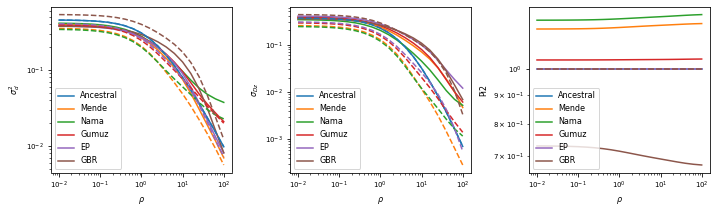

In [33]:
rhos = np.logspace(-2, 2, 21)

# plot D2
f = plt.figure(figsize=(10,3))
ax = f.add_subplot(131)
ax2 = f.add_subplot(132)
ax3 = f.add_subplot(133)

ax.plot(rhos,anc_sliced_LD['anc'][-1][:,0],label="Ancestral")
ax.plot(rhos,mws_sliced_LD['MSL'][-1][:,0],label="Mende")
ax.plot(rhos,mws_sliced_LD['Nama'][-1][:,0],label="Nama")
ax.plot(rhos,mws_sliced_LD['Gumuz'][-1][:,0],label="Gumuz")
ax.plot(rhos,mws_sliced_LD['EP'][-1][:,0],label="EP")
ax.plot(rhos,mws_sliced_LD['GBR'][-1][:,0],label="GBR")

ax.plot(rhos,anc_sc_sliced_LD['Deme'][-1][:,0],'--',color="tab:blue")
ax.plot(rhos,msl_sliced_LD['Deme'][-1][:,0],'--',color="tab:orange")
ax.plot(rhos,nama_sliced_LD['Deme'][-1][:,0],'--',color="tab:green")
ax.plot(rhos,gumuz_sliced_LD['Deme'][-1][:,0],'--',color="tab:red")
ax.plot(rhos,EP_sliced_LD['Deme'][-1][:,0],'--',color="tab:purple")
ax.plot(rhos,GBR_sliced_LD['Deme'][-1][:,0],'--',color="tab:brown")

ax.legend()
ax.set_yscale("log")
ax.set_xscale("log")
ax.set_ylabel(r"$\sigma_d^2$")
ax.set_xlabel(r"$\rho$")

# plot DZ
ax2.plot(rhos,anc_sliced_LD['anc'][-1][:,1],label="Ancestral")
ax2.plot(rhos,mws_sliced_LD['MSL'][-1][:,1],label="Mende")
ax2.plot(rhos,mws_sliced_LD['Nama'][-1][:,1],label="Nama")
ax2.plot(rhos,mws_sliced_LD['Gumuz'][-1][:,1],label="Gumuz")
ax2.plot(rhos,mws_sliced_LD['EP'][-1][:,1],label="EP")
ax2.plot(rhos,mws_sliced_LD['GBR'][-1][:,1],label="GBR")

ax2.plot(rhos,anc_sc_sliced_LD['Deme'][-1][:,1],'--',color="tab:blue")
ax2.plot(rhos,msl_sliced_LD['Deme'][-1][:,1],'--',color="tab:orange")
ax2.plot(rhos,nama_sliced_LD['Deme'][-1][:,1],'--',color="tab:green")
ax2.plot(rhos,gumuz_sliced_LD['Deme'][-1][:,1],'--',color="tab:red")
ax2.plot(rhos,EP_sliced_LD['Deme'][-1][:,1],'--',color="tab:purple")
ax2.plot(rhos,GBR_sliced_LD['Deme'][-1][:,1],'--',color="tab:brown")

ax2.legend()
ax2.set_yscale("log")
ax2.set_xscale("log")
ax2.set_ylabel(r"$\sigma_{Dz}$")
ax2.set_xlabel(r"$\rho$")

# plot Pi2
ax3.plot(rhos,anc_sliced_LD['anc'][-1][:,2],label="Ancestral")
ax3.plot(rhos,mws_sliced_LD['MSL'][-1][:,2],label="Mende")
ax3.plot(rhos,mws_sliced_LD['Nama'][-1][:,2],label="Nama")
ax3.plot(rhos,mws_sliced_LD['Gumuz'][-1][:,2],label="Gumuz")
ax3.plot(rhos,mws_sliced_LD['EP'][-1][:,2],label="EP")
ax3.plot(rhos,mws_sliced_LD['GBR'][-1][:,2],label="GBR")

ax3.plot(rhos,anc_sc_sliced_LD['Deme'][-1][:,2],'--',color="tab:blue")
ax3.plot(rhos,msl_sliced_LD['Deme'][-1][:,2],'--',color="tab:orange")
ax3.plot(rhos,nama_sliced_LD['Deme'][-1][:,2],'--',color="tab:green")
ax3.plot(rhos,gumuz_sliced_LD['Deme'][-1][:,2],'--',color="tab:red")
ax3.plot(rhos,EP_sliced_LD['Deme'][-1][:,2],'--',color="tab:purple")
ax3.plot(rhos,GBR_sliced_LD['Deme'][-1][:,2],'--',color="tab:brown")

ax3.legend()
ax3.set_yscale("log")
ax3.set_xscale("log")
ax3.set_ylabel(r"Pi2")
ax3.set_xlabel(r"$\rho$")

plt.tight_layout()
plt.savefig("Dstats_allpops.pdf",format='pdf',transparent = False)
#plt.show()

All pops model - IIRC

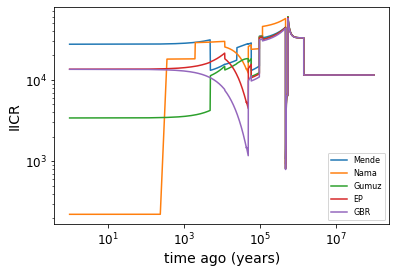

In [34]:
plt.plot(T, msl_iicr,label="Mende") #Mende
plt.plot(T, nama_iicr, label="Nama") #Nama
plt.plot(T, Gumuz_iicr, label="Gumuz") #Gumuz
plt.plot(T, EP_iicr,label="EP") #EP
plt.plot(T, GBR_iicr,label="GBR") #GBR
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)
plt.yscale("log")
plt.xscale("log")
plt.legend()
plt.xlabel("time ago (years)",fontsize = 14)
plt.ylabel(r"IICR",fontsize = 14);

------

The mende had recent migration with the GBR

### Run analysis using the Relate curve as the iicr and the model LD as the ground truth.

In [16]:
relate_file = '../data/popsize/simulated-merger-with-stem/sim_popsize_repALL.coal'
pops,times,pop_sizes = read_relate(relate_file,29)

['EP', 'GBR', 'Gumuz', 'MSL', 'Nama'] [0.0000000e+00 1.0000012e+03 1.3894944e+03 1.9306982e+03 2.6826972e+03
 3.7276020e+03 5.1794870e+03 7.1968720e+03 1.0000012e+04 1.3894944e+04
 1.9306982e+04 2.6826972e+04 3.7276020e+04 5.1794870e+04 7.1968720e+04
 1.0000012e+05 1.3894944e+05 1.9306982e+05 2.6826972e+05 3.7276020e+05
 5.1794870e+05 7.1968720e+05 1.0000012e+06 1.3894944e+06 1.9306982e+06
 2.6826972e+06 3.7276020e+06 5.1794870e+06 7.1968720e+06 1.0000012e+07
 1.0000012e+08]


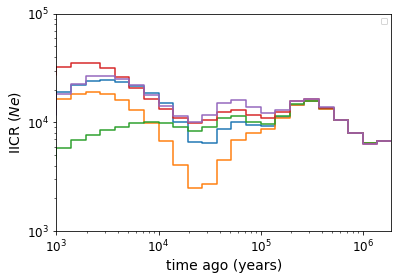

In [17]:
plot_iicr(pop_sizes[("EP","EP")],times)
plot_iicr(pop_sizes[("GBR","GBR")],times)
plot_iicr(pop_sizes[("Gumuz","Gumuz")],times)
plot_iicr(pop_sizes[("MSL","MSL")],times)
plot_iicr(pop_sizes[("Nama","Nama")],times)
plt.legend()

In [18]:
def calculate_signal_Dz(LDpop1,LDpop2):
    '''Calculates the Mean log difference between the two decays of D2'''
    x = LDpop1[:,1]
    y = LDpop2[:,1]
    log_diff = np.diff(np.log(x) - np.log(y)) # calculate difference
    mld= np.mean(log_diff)
    return mld

def calculate_signal_D2(LDpop1,LDpop2):
    '''Calculates the Mean log difference between the two decays of D2'''
    x = LDpop1[:,0]
    y = LDpop2[:,0]
    log_diff = np.diff(np.log(x) - np.log(y)) # calculate difference
    mld= np.mean(log_diff)
    return mld

In [19]:
def run_LD_analysis_from_relate(model_iicr,times,LD_truth,time_units="generations",generation_time=1):
    # Sample times at epochs 
    model_sc = model.size_change_from_iicr(model_iicr,times,time_units=time_units,generation_time=generation_time,plot=True)
    # Slice the generated model and get LD
    model_sc_sliced = slice.slice_timepoints(model_sc,time_points=[0])
    model_sc_sliced_LD = get_LD.get_LD_from_sliced_demes(model_sc_sliced)
    # Get signal magnitude
    x = LD_truth[-1] # Model or truth
    y = model_sc_sliced_LD['Deme'][-1] # size change
    plot_comparison(x,y)
    signal_dz = calculate_signal_Dz(x,y)
    signal_d2 = calculate_signal_D2(x,y)

    return [signal_d2,signal_dz],model_sc_sliced_LD['Deme']

In [20]:
mws_sliced_LD.keys()

dict_keys(['Nama', 'Gumuz', 'MSL', 'GBR', 'EP'])

EP


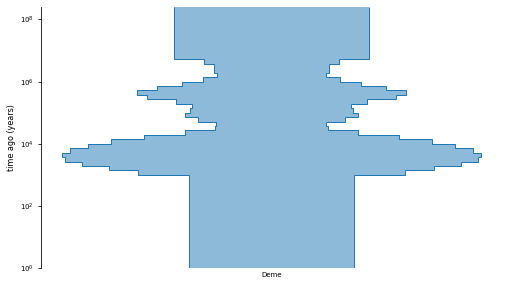

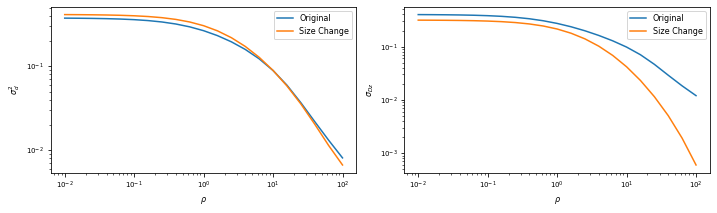

GBR


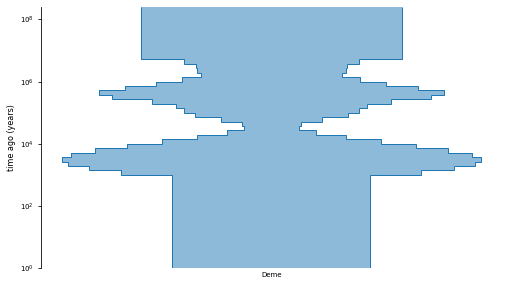

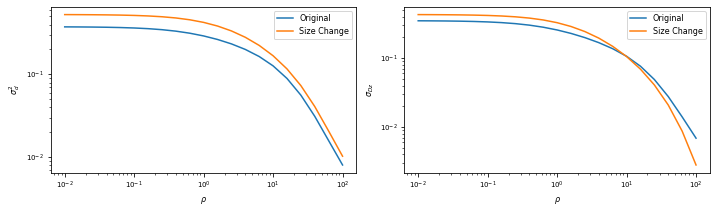

Gumuz


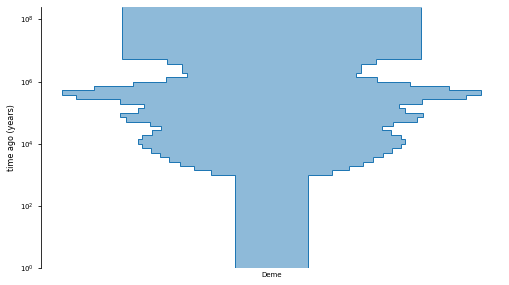

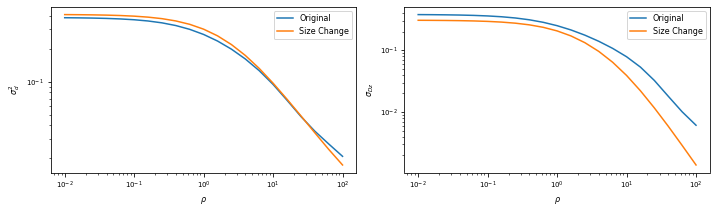

MSL


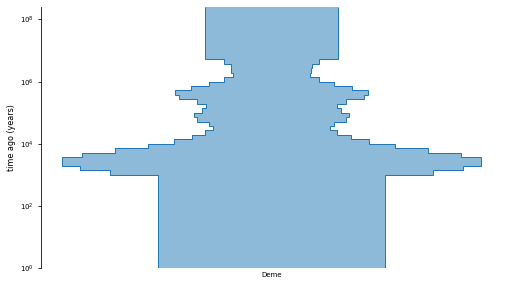

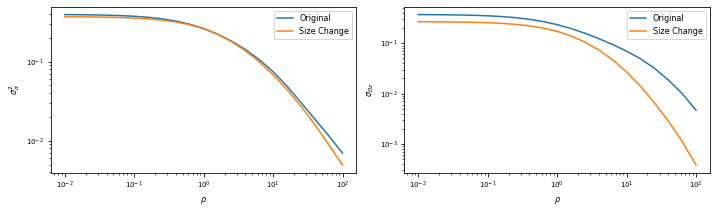

Nama


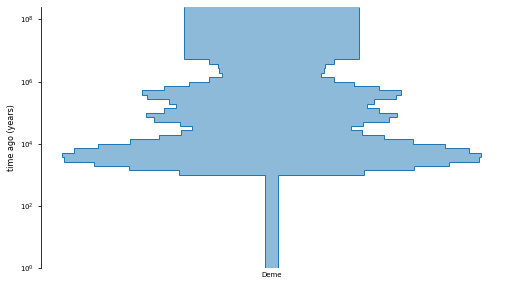

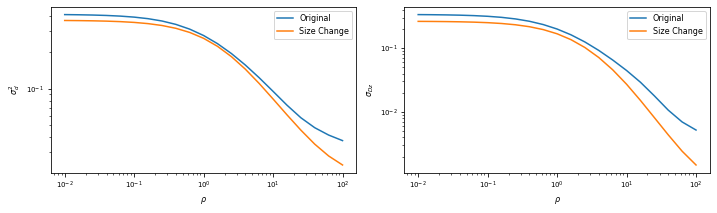

In [21]:
signals_Dz={}
LD={}
for pop in pops:
    print(pop)
    signal,LD_pop = run_LD_analysis_from_relate(pop_sizes[(pop,pop)][:-3],times,LD_truth=mws_sliced_LD[pop],time_units="years",generation_time=29)
    signals_Dz[pop] = signal
    LD[pop] = LD_pop

In [22]:
signals_Dz

{'EP': [0.014618052962012646, 0.13775116632766005],
 'GBR': [0.004837694680656074, 0.05519104896999225],
 'Gumuz': [0.012386229153533207, 0.06343663053122842],
 'MSL': [0.01399168250474162, 0.10895194127714122],
 'Nama': [0.01760367623089256, 0.05077269411200369]}

In [19]:
signal_df = pd.DataFrame(signals_Dz, index = [r"$\sigma_{D^2}$",r"$\sigma_{Dz}$"]).transpose()

In [20]:
import seaborn as sns

In [21]:
plt.figure(figsize=(3,7))
sns.set(font_scale=1)
heatmap = sns.heatmap(signal_df, linewidth = 1 , vmin=0,annot = True)
heatmap.xaxis.tick_top()
#heat_map.invert_yaxis()
#plt.title( "Mean log difference" )
#plt.show()
plt.savefig("Dstats_allpops_relate_modeltruth.svg",format='svg',transparent = False,bbox_inches = 'tight')
plt.clf()
plt.cla()
plt.close()


In [23]:
import copy

In [24]:
LD

{'EP': [array([[4.14726738e-01, 3.13019436e-01, 1.00000000e+00],
         [4.13840283e-01, 3.12196124e-01, 1.00000000e+00],
         [4.12443405e-01, 3.10899113e-01, 1.00000000e+00],
         [4.10249518e-01, 3.08862992e-01, 1.00000000e+00],
         [4.06821850e-01, 3.05684095e-01, 1.00000000e+00],
         [4.01510099e-01, 3.00763520e-01, 1.00000000e+00],
         [3.93382009e-01, 2.93247935e-01, 1.00000000e+00],
         [3.81182011e-01, 2.82001082e-01, 1.00000000e+00],
         [3.63390726e-01, 2.65680081e-01, 1.00000000e+00],
         [3.38505204e-01, 2.43035409e-01, 1.00000000e+00],
         [3.05635833e-01, 2.13525497e-01, 1.00000000e+00],
         [2.65285129e-01, 1.78092268e-01, 1.00000000e+00],
         [2.19768962e-01, 1.39505915e-01, 1.00000000e+00],
         [1.72743735e-01, 1.01671745e-01, 1.00000000e+00],
         [1.28149566e-01, 6.82688209e-02, 1.00000000e+00],
         [8.93232016e-02, 4.17820746e-02, 1.00000000e+00],
         [5.83194166e-02, 2.31117134e-02, 1.000000

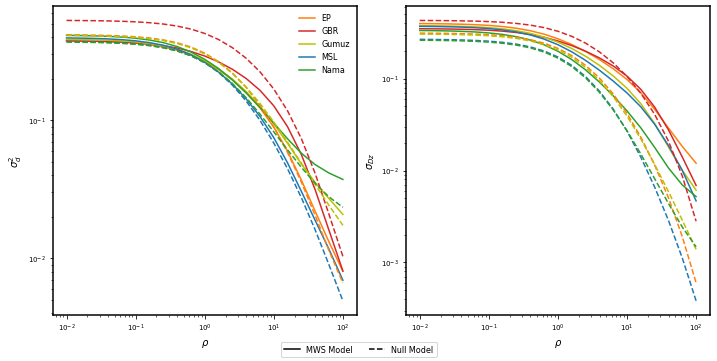

In [25]:

rhos = np.logspace(-2, 2, 21)

# plot D2
f = plt.figure(figsize=(10,5))
ax = f.add_subplot(121,)
ax2 = f.add_subplot(122)

colors = {"EP":"tab:orange","GBR":"tab:red","Gumuz":"y","MSL":"tab:blue","Nama":"tab:green"}

line=[]
# Plot D2
for pop in colors.keys():
    h, = ax.plot(rhos,mws_sliced_LD[pop][-1][:,0],label=pop,color=colors[pop])
line.append(copy.copy(h))

ax.legend(frameon=False)

for pop in colors.keys():
    h, = ax.plot(rhos,LD[pop][-1][:,0],'--',label=pop,color=colors[pop])
line.append(copy.copy(h))

ax.set_yscale("log")
ax.set_xscale("log")
ax.set_ylabel(r"$\sigma_d^2$",fontsize=10)
ax.set_xlabel(r"$\rho$",fontsize=10)

for h in line:
    h.set_color("black")

leg = Legend(f, line, ['MWS Model', 'Null Model'],loc='lower center', ncol=2)
f.add_artist(leg);

# plot DZ
for pop in colors.keys():
    ax2.plot(rhos,mws_sliced_LD[pop][-1][:,1],label=pop,color=colors[pop])
    

for pop in colors.keys():
    ax2.plot(rhos,LD[pop][-1][:,1],'--',label=pop,color=colors[pop])

ax2.set_yscale("log")
ax2.set_xscale("log")
ax2.set_ylabel(r"$\sigma_{Dz}$",fontsize=10)
ax2.set_xlabel(r"$\rho$",fontsize=10)

for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(1.5)
    ax2.spines[axis].set_linewidth(1.5)

plt.tight_layout()
plt.savefig("Dstats_allpops.svg",format='svg',transparent = False)
#plt.show()